# Simulação de um sistema Massa-mola com um grau de liberdade
Exercício programa da disciplina PME3200 da Escola Politécnica da USP à respeito de simulação de sistemas usando Python 

<img src="img/mola.jpeg" alt="titulo" style="width: 800px;"/>

Analisando o problema, é possível perceber que o sistema consiste em um Movimento Harmônico Amortecido e Forçado (MHAF). Se aplicarmos a Segunda Lei de Newton, teremos facilmente nossa equação diferencial de segunda ordem:


$$ m \ddot{X} = F(t) -c\dot{X} -kX$$

Sendo "C" a constante do amortecedor viscoso e "k", a rigidez da mola.

Fazendo algumas alterações, temos:

$$ \ddot{X} = \frac{F(t)}{m} - \frac{c\dot{X}}{m} - \frac{kX}{m} $$

## Montando as condições iniciais
Vamos agora montar as condições básicas que serão invariantes em todos os exercícios, assim como, importar as bibliotecas necessárias para o problema.

In [137]:
# importando bibliotecas
import numpy as np #usada para criar o espaço de tempo
import matplotlib.pyplot as plt #usada para criar os gráficos
from scipy.integrate import odeint as ode #usada para fazer a integração

In [138]:
# colocando condições iniciais
m = 10 #massa de 10kg
k = 3553 #constante de elasticidade, em N/m
c = 37.7 #constante de amortecimento
F = 0 #valor da força temporário para que seja possível criar a variável parametros
parametros = [m,k,c,F]

In [139]:
def sistema(x,t,m,k,c,F):
    '''
    Monta o Vetor que usaremos em nossa integral
    '''
    
    xdot = [0,0] 
    
    xdot[0] = x[1]
    xdot[1] = (F(t)/m) - (c*x[1])/m - k*x[0]/m
    
    return xdot 

In [140]:
def tempo(ti,tf):
    '''
    Cria o espaço de tempo na qual vamos realização a integral
    '''
    return np.arange(ti,tf,0.01)

In [141]:
def resolvedor(sistema,x,t,parametros):
    par = tuple(i for i in parametros[0:])
    X = ode(sistema,x,t,args=par)
    return X

In [142]:
def resolucao(X,X_dot,t,F):
    fig, ax= plt.subplots(2, 2, figsize = (10, 10))
    fig.suptitle('Gráficos da Resolução', fontsize =20)
    
    ax[0][0].plot(t, X)
    ax[0][0].set_title('posição x tempo')
    
    ax[0][1].plot(t, X_dot)
    ax[0][1].set_title('velocidade x tempo')
    
    ax[1][0].plot(X_dot, X)
    ax[1][0].set_title('posição x velocidade')
    
   
    ax[1][1].plot(t, [F(time) for time in t])
    ax[1][1].set_title('força x tempo')

    fig.tight_layout()
    plt.subplots_adjust(top=0.90)
    plt.show()

## Aplicando - Caso A

In [143]:
# consições do caso A
x = [0.1 , 0] #o primeiro argumento se trata de X(0) e o segundo V(0)
ti=0 #tempo de inicio
tf=3 #tempo de fim do movimento

In [144]:
t = tempo(ti,tf)

In [145]:
Fa = lambda t: 0
parametros_a = parametros[:]
parametros_a[3] = Fa

In [146]:
X = resolvedor(sistema,x,t,parametros_a)

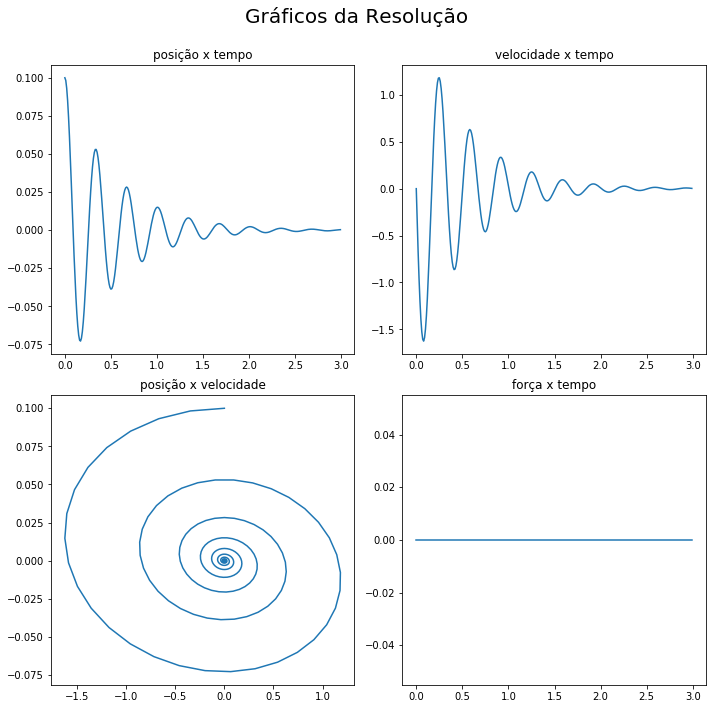

In [147]:
resolucao(X[:,0],X[:,1],t,Fa)

## Aplicando - Caso B

In [148]:
x = [0.0,1.0]
ti=0
tf=3

In [149]:
t = tempo(ti,tf)

In [150]:
Fb = lambda t: 0
parametros_b = parametros[:]
parametros_b[3] = Fb

In [151]:
X = resolvedor(sistema,x,t,parametros_b)

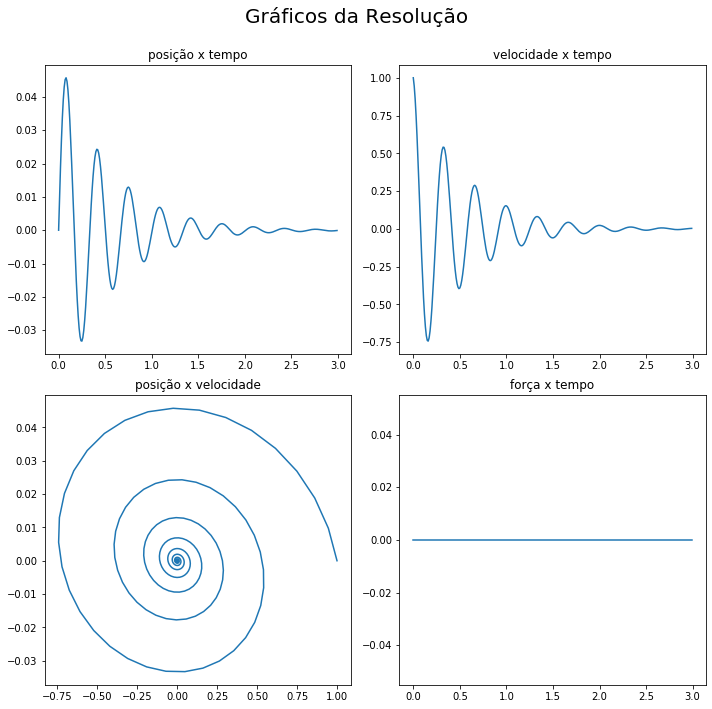

In [152]:
resolucao(X[:,0],X[:,1],t,Fb)

## Aplicando - Caso C

In [153]:
c = 377
ti = 0
tf = 3
x = [0.1,1.0]
parametros = [m,k,c,F]
t = tempo(ti,tf)

In [154]:
Fc = lambda t: 0
parametros_c = parametros[:]
parametros_c[3] = Fc

In [155]:
X = resolvedor(sistema,x,t,parametros_c)

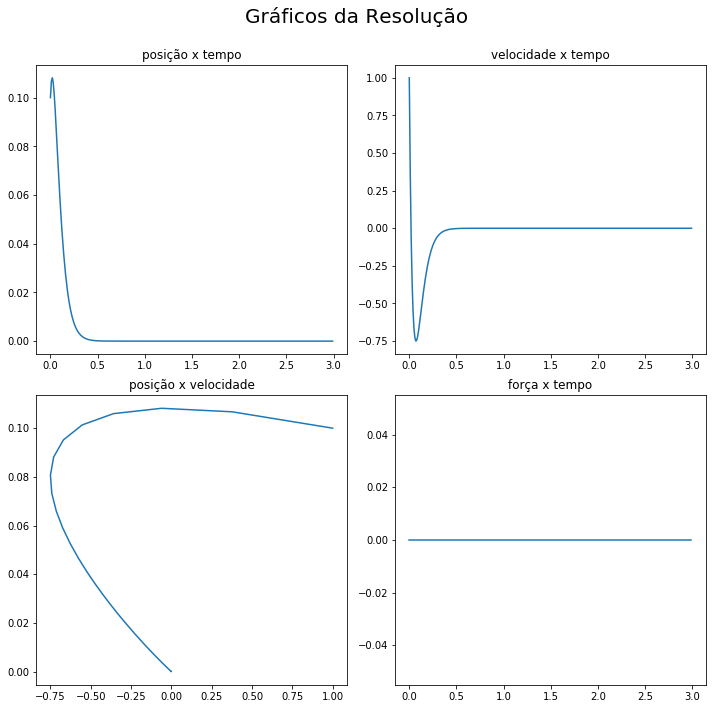

In [156]:
resolucao(X[:,0],X[:,1],t,Fc)

## Aplicando - Caso D

In [157]:
c = 37.7
ti = 0
tf = 5
x = [0.0,0.0]
parametros = [m,k,c,F]
t = tempo(ti,tf)

In [158]:
Fd = lambda t: 1000*np.sin(np.pi*t + np.pi/2)
parametros_d = parametros[:]
parametros_d[3] = Fd

In [159]:
X = resolvedor(sistema,x,t,parametros_d)

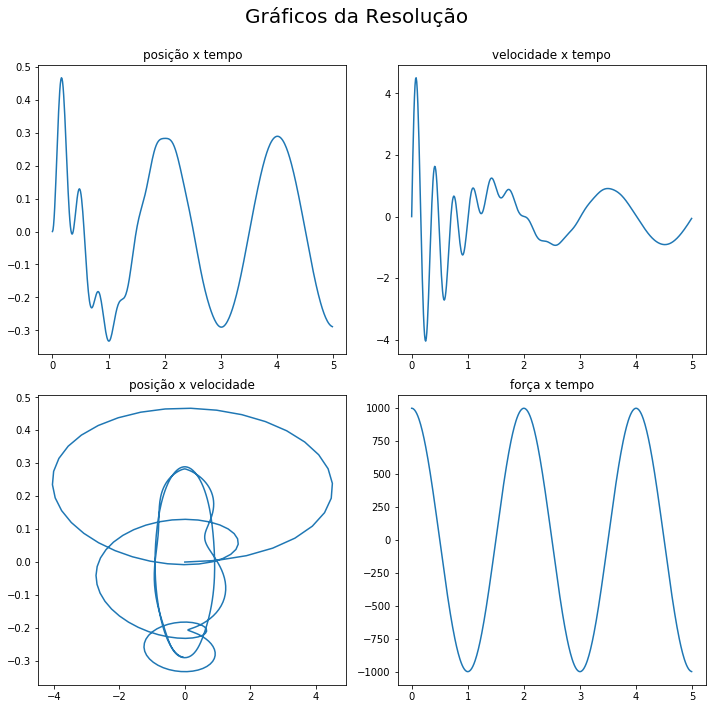

In [160]:
resolucao(X[:,0],X[:,1],t,Fd)

In [161]:
ti = 0
tf = 3
x = [0.0,0.0]
t = tempo(ti,tf)

In [162]:
def f(t):
    if t<0.5:
        return 0
    else:
        return 1000

Fe = lambda t: f(t)
parametros_e = parametros[:]
parametros_e[3] = Fe

In [163]:
X = resolvedor(sistema,x,t,parametros_e)

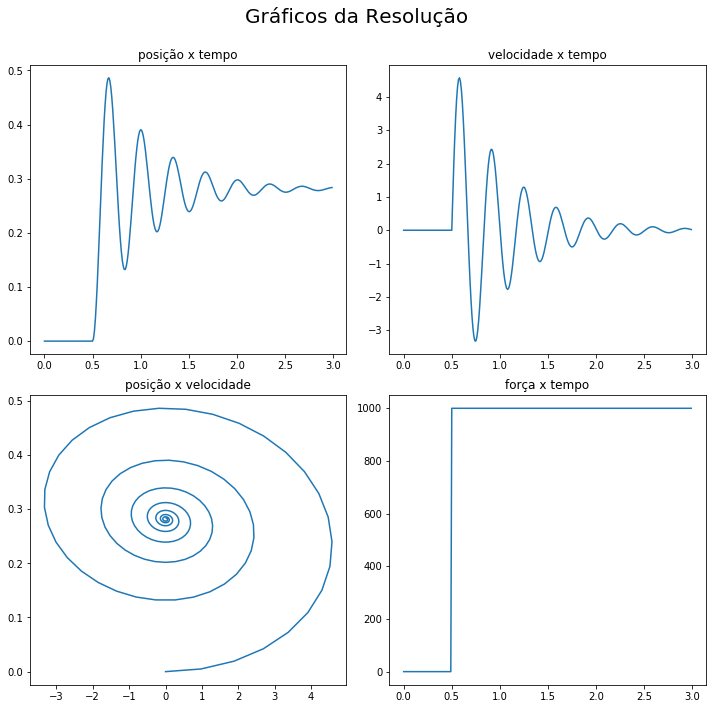

In [164]:
resolucao(X[:,0],X[:,1],t,Fe)